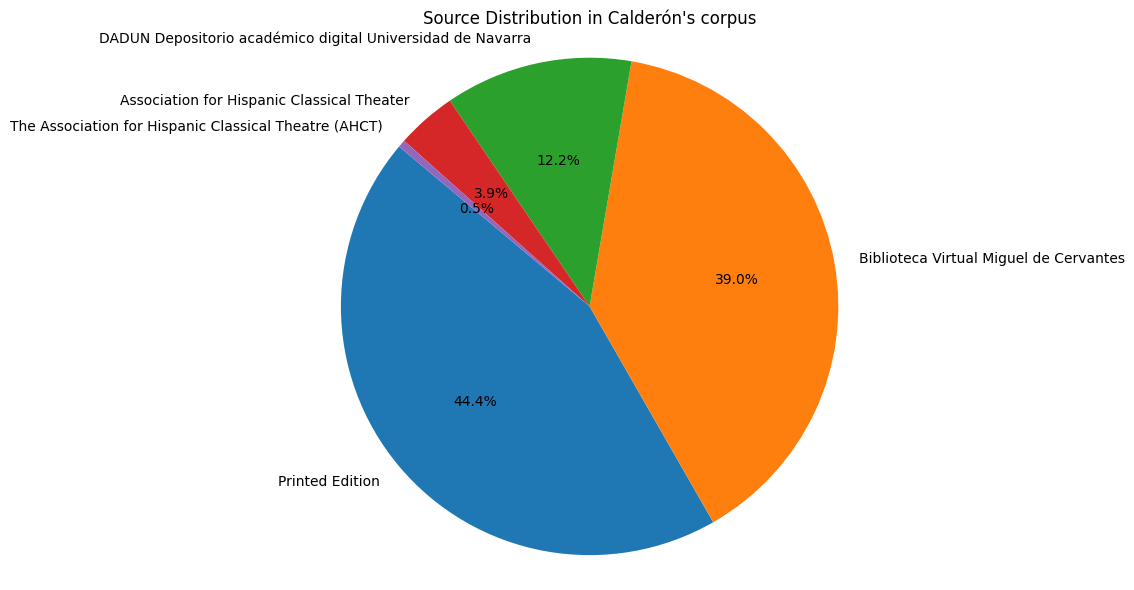

In [4]:
import os
import csv
from collections import defaultdict
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt

# Function to extract source of editions from TEI documents
def extract_source_from_tei(tei_file):
    namespaces = {'tei': 'http://www.tei-c.org/ns/1.0'}
    tree = ET.parse(tei_file)
    root = tree.getroot()
    source_name = root.find('.//tei:teiHeader/tei:fileDesc/tei:sourceDesc/tei:bibl/tei:name', namespaces)
    if source_name is not None and source_name.text:
        return source_name.text
    else:
        return "Printed Edition"

# Function to process TEI documents in a folder
def process_tei_folder(folder_path):
    source_count = defaultdict(int)
    total_files = 0
    
    # Iterate over each file in the folder
    for filename in os.listdir(folder_path):
        if filename.endswith('.xml'):
            total_files += 1
            filepath = os.path.join(folder_path, filename)
            source = extract_source_from_tei(filepath)
            # Count the occurrence of each source
            source_count[source] += 1
                
    # Calculate proportion and write to CSV
    output_file = 'output/source_distribution.csv'
    os.makedirs(os.path.dirname(output_file), exist_ok=True)
    with open(output_file, 'w', newline='', encoding='utf-8') as csvfile:
        fieldnames = ['Source', 'Frequency', 'Proportion']
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        writer.writeheader()
        for source, freq in sorted(source_count.items(), key=lambda x: x[1], reverse=True):
            proportion = freq / total_files * 100
            writer.writerow({'Source': source, 'Frequency': freq, 'Proportion': proportion})
    
    # Generate pie chart
    sorted_sources = [source for source, _ in sorted(source_count.items(), key=lambda x: x[1], reverse=True)]
    frequencies = [source_count[source] for source in sorted_sources]
    plt.figure(figsize=(10, 6))
    plt.pie(frequencies, labels=sorted_sources, autopct='%1.1f%%', startangle=140)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.title('Source Distribution in Calderón\'s corpus')
    plt.tight_layout()
    
    # Save the image
    img_output_folder = 'output'
    os.makedirs(img_output_folder, exist_ok=True)
    img_path = os.path.join(img_output_folder, 'source_distribution.png')
    plt.savefig(img_path)
    plt.show()

# Folder containing TEI documents
tei_folder = '../results'

# Process the TEI documents
process_tei_folder(tei_folder)
